# Cross sectional data processing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

import json

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
# load the csv file 
video_df = pd.read_csv("./cross_sectional_video_df2.csv")
video_df

,update_Id,video_id,views,release_date,likes,comments,videos,subscribers,views_total,price,dates_passed,sales
0,UCkH3CcMfqww9RsZvPRPkAJA,bgCjtExCUGU,135232,2024-08-20T08:00:19Z,6017,NaN,3214,3020000,1676066003,35479,2727,141870000
1,UCkH3CcMfqww9RsZvPRPkAJA,ijrMlmi8YQo,169071,2024-08-20T08:00:22Z,7105,NaN,3214,3020000,1676066003,35479,2727,141870000
2,UCkH3CcMfqww9RsZvPRPkAJA,2EaPDCRWmOk,105842,2024-08-19T08:00:00Z,2087,NaN,3214,3020000,1676066003,35479,2727,141870000
3,UCkH3CcMfqww9RsZvPRPkAJA,NcJeLpoSffc,59515,2024-08-16T08:00:25Z,1412,NaN,3214,3020000,1676066003,35479,2727,141870000
4,UCkH3CcMfqww9RsZvPRPkAJA,FSAD0p-D00E,0,2024-08-14T05:19:08Z,52,NaN,3214,3020000,1676066003,35479,2727,141870000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,UCjBp_7RuDBUYbd1LegWEJ8g,T7aVUqmQ_Sc,278410,2023-04-27T16:00:26Z,8517,534.0,13262,5490000,1464798968,59978,1379,29240000
146,UCjBp_7RuDBUYbd1LegWEJ8g,oD3knsWSbAE,120249,2023-04-25T16:00:37Z,3553,166.0,13262,5490000,1464798968,59978,1379,29240000
147,UCjBp_7RuDBUYbd1LegWEJ8g,yseXr3U2JGQ,267428,2023-04-25T15:00:43Z,7554,372.0,13262,5490000,1464798968,59978,1379,29240000
148,UCjBp_7RuDBUYbd1LegWEJ8g,hSt2hEKvHB4,18501,2023-04-11T17:00:20Z,762,29.0,13262,5490000,1464798968,59978,1379,29240000


In [11]:
# convert each variable to numeric
video_df['views'] = pd.to_numeric(video_df['views'], errors='coerce')
video_df['likes'] = pd.to_numeric(video_df['likes'], errors='coerce')
video_df['sales'] = pd.to_numeric(video_df['sales'], errors='coerce')

video_df['videos'] = pd.to_numeric(video_df['videos'], errors='coerce')
video_df['subscribers'] = pd.to_numeric(video_df['subscribers'], errors='coerce')
video_df['views_total'] = pd.to_numeric(video_df['views_total'], errors='coerce')
video_df['dates_passed'] = pd.to_numeric(video_df['dates_passed'], errors='coerce')
video_df['price'] = pd.to_numeric(video_df['price'], errors='coerce')

In [12]:
# Logarithmic conversion of views
video_df["views"] = video_df["views"].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Rows containing missing values in the VIEW column are dropped
video_df = video_df.dropna(subset=["views"])


In [13]:
video_df

,update_Id,video_id,views,release_date,likes,comments,videos,subscribers,views_total,price,dates_passed,sales
0,UCkH3CcMfqww9RsZvPRPkAJA,bgCjtExCUGU,11.814747,2024-08-20T08:00:19Z,6017,NaN,3214,3020000,1676066003,35479,2727,141870000
1,UCkH3CcMfqww9RsZvPRPkAJA,ijrMlmi8YQo,12.038074,2024-08-20T08:00:22Z,7105,NaN,3214,3020000,1676066003,35479,2727,141870000
2,UCkH3CcMfqww9RsZvPRPkAJA,2EaPDCRWmOk,11.569703,2024-08-19T08:00:00Z,2087,NaN,3214,3020000,1676066003,35479,2727,141870000
3,UCkH3CcMfqww9RsZvPRPkAJA,NcJeLpoSffc,10.993984,2024-08-16T08:00:25Z,1412,NaN,3214,3020000,1676066003,35479,2727,141870000
5,UCkH3CcMfqww9RsZvPRPkAJA,rILjJnr0Dac,10.758520,2024-04-12T06:00:30Z,1418,NaN,3214,3020000,1676066003,35479,2727,141870000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,UCjBp_7RuDBUYbd1LegWEJ8g,T7aVUqmQ_Sc,12.536850,2023-04-27T16:00:26Z,8517,534.0,13262,5490000,1464798968,59978,1379,29240000
146,UCjBp_7RuDBUYbd1LegWEJ8g,oD3knsWSbAE,11.697320,2023-04-25T16:00:37Z,3553,166.0,13262,5490000,1464798968,59978,1379,29240000
147,UCjBp_7RuDBUYbd1LegWEJ8g,yseXr3U2JGQ,12.496606,2023-04-25T15:00:43Z,7554,372.0,13262,5490000,1464798968,59978,1379,29240000
148,UCjBp_7RuDBUYbd1LegWEJ8g,hSt2hEKvHB4,9.825580,2023-04-11T17:00:20Z,762,29.0,13262,5490000,1464798968,59978,1379,29240000


In [15]:
# drop the comments column because comment is not open in Nintendo videos 
video_df2 = video_df[["sales", "views", "dates_passed", "likes", "price", "videos", "subscribers", "views_total"]]
video_df2

,sales,views,dates_passed,likes,price,videos,subscribers,views_total
0,141870000,11.814747,2727,6017,35479,3214,3020000,1676066003
1,141870000,12.038074,2727,7105,35479,3214,3020000,1676066003
2,141870000,11.569703,2727,2087,35479,3214,3020000,1676066003
3,141870000,10.993984,2727,1412,35479,3214,3020000,1676066003
5,141870000,10.758520,2727,1418,35479,3214,3020000,1676066003
...,...,...,...,...,...,...,...,...
145,29240000,12.536850,1379,8517,59978,13262,5490000,1464798968
146,29240000,11.697320,1379,3553,59978,13262,5490000,1464798968
147,29240000,12.496606,1379,7554,59978,13262,5490000,1464798968
148,29240000,9.825580,1379,762,59978,13262,5490000,1464798968


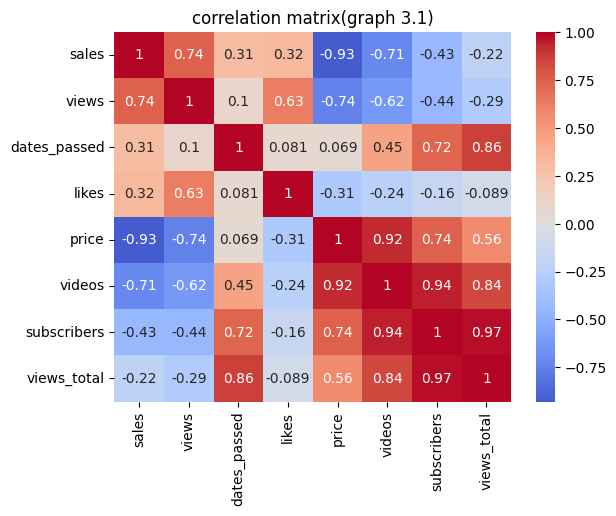

In [16]:
# Examine the correlation of each variable in each of the above data frames
correlation_matrix = video_df2.corr()

# Correlation matrices are displayed in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("correlation matrix(graph 3.1)")
plt.show()


In [17]:
# selecting the variables, the correlation matric considered 
video_df3 = video_df2[["views", "likes", "videos", "dates_passed"]]

# Cross sectional analysis

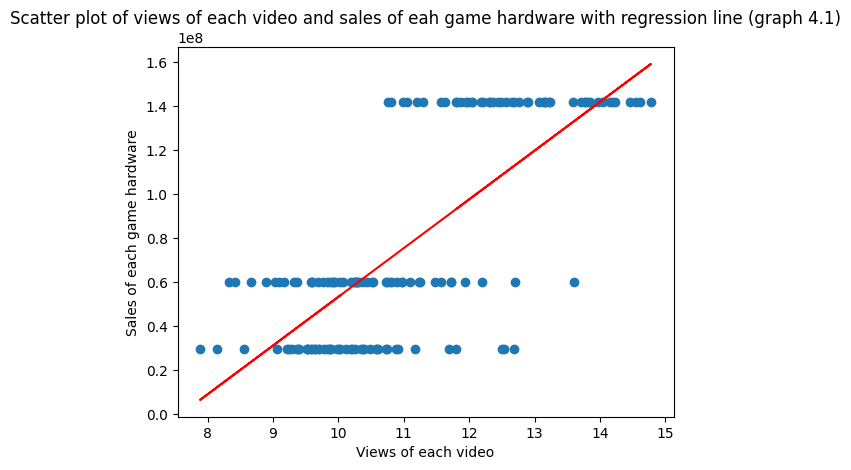

In [18]:
# scatter plot
plt.scatter(video_df["views"], video_df["sales"])

#  Calculate the coefficients of the regression line using polyfit in numpy
slope, intercept = np.polyfit(video_df["views"], video_df["sales"], 1)

# plot the regression line
plt.plot(video_df["views"], slope * video_df["views"] + intercept, color='red')  # 回帰直線


plt.xlabel('Views of each video')
plt.ylabel('Sales of each game hardware')
plt.title('Scatter plot of views of each video and sales of eah game hardware with regression line (graph 4.1)')

plt.show()

Table 4.1

In [19]:
# liner regression
X = video_df3
X = sm.add_constant(X)

y = video_df2["sales"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.245e+26
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:44:25   Log-Likelihood:                 1494.6
No. Observations:                 147   AIC:                            -2979.
Df Residuals:                     142   BIC:                            -2964.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.084e+07   1.07e-05    5.7e+12   